In [8]:
import numpy as np
from math import gamma
from math import factorial
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Euler 极限定义：
$$\Gamma(x) := \lim_{N\rightarrow\infty}\left[\frac{N!N^x}{x(x + 1)(x + 2)\cdots(x + N)}\right] \tag{1.3.1}$$
积分定义式：
$$\Gamma(x) := \int_0^\infty y^{x - 1}e^y\mathrm{d}y, (x > 0) \tag{1.3.2}$$
递归关系（分部积分可证）：
$$\Gamma(x + 1) = x \Gamma(x) \tag{1.3.3}$$
$$\Gamma(1) = \lim_{N\rightarrow\infty} \frac{N!N}{1\cdot2\cdot3\cdots N\cdot (N + 1)} = \lim_{N\rightarrow\infty}\frac{N}{N + 1} = 1$$
$$\Gamma(N + 1) = n\Gamma(n) = n\cdot(n - 1)\Gamma(n - 1) = n(n - 1)\cdots2\cdot1 = n!$$
也可写作：$\Gamma(x - 1) = \frac{\Gamma(x)}{x - 1}$
对 $\Gamma$ 函数进行解析延拓（analytic continuation）后：
$$\Gamma(0) = \infty, $$
$$\forall n \in \mathbb{Z}, n \leqslant 0,\Gamma(n)=\infty$$
但比率是有限的：$\forall n, N \in \mathbb{N}^{+}$
$$
\because \Gamma(-n)=\frac{\Gamma(-n+1)}{-n}=\frac{\Gamma(-n+2)}{(-n)(-n+1)}=\frac{\Gamma(-n+n+1)}{(-n)(-n+1) \cdots(-n+n)}
$$
$$
\begin{aligned} \therefore \frac{\Gamma(-n)}{\Gamma(-N)} &=\frac{(-N)(-N+1) \cdots(-N+N)}{(-n)(-n+1) \cdots(-n+N)} \\ &=\frac{(-1)^{N+1} N !}{(-1)^{n+1} n !}=(-1)^{N-n} \frac{N !}{n !} \end{aligned} \tag{1.3.4}
$$
where $N > n$.

$$
\frac{\Gamma(j-q)}{\Gamma(-q) \Gamma(j+1)}=\left(\begin{array}{c}{j-q-1} \\ {j}\end{array}\right)=(-1)^{j}\left(\begin{array}{l}{q} \\ {j}\end{array}\right) \tag{1.3.16}
$$

$$
\begin{aligned}\therefore\left(\begin{array}{c}{-n} \\ {m}\end{array}\right)=C_{-n}^{m} &=\frac{(-n)(-n-1) \cdots(-n-m+1)}{m !} \\ &=(-1)^{n} \frac{n(n+1) \cdots(n+m-1)}{m !} \\ &=(-1)^{n} C_{n+m-1}^{m}=(-1)^{n}\left(\begin{array}{c}{n+m-1} \\ {m}\end{array}\right) \end{aligned}
$$

$$\frac{\mathrm d^{q} f}{[\mathrm d(x-a)]^{q}} := \lim _{N \rightarrow \infty}\left[\frac{\left(\frac{x-a}{N}\right)^{-q}}{\Gamma(-q)} \sum_{j=0}^{N-1} \frac{\Gamma(j-q)}{\Gamma(j+1)} f\left(x-j \cdot \frac{x-a}{N}\right)\right] \tag{3.2.1}$$

In [9]:
def my_gamma(j, q):
    if q % 1 != 0 or q < 0:
        return gamma(j - q) / gamma(-q) / gamma(j + 1)
    else:
        if j - q > 0:
            return 0
        else:
            return (-1) ** j * factorial(q) / factorial(j) / factorial(q - j)

# 给定数据集和阶数 q，以数据集自变量 x_list 中第 a_n 个数为下限，对 x_list 中第 x_n 个数求分数阶微积分
def differintegral(x_list, y_list, q, a_n, x_n):
    N = len(x_list)
    result = 0
    for j in range(x_n - a_n):
        result += my_gamma(j, q) * y_list[x_n - j]
    return (x_list[1] - x_list[0]) ** (-q) * result

In [88]:
# 计算
x_list = [i/10 for i in range(40)]
y_list = [1 for i in range(40)]
q_list = [2, 3/2, 1, 1/2, 0, -1/2, -1, -3/2, -2]
y_result = {}
for q in q_list:
    temp = np.empty(40)
    for i in range(40):
        temp[i] = differintegral(x_list, y_list, q, 0, i)
    y_result[q] = temp

Text(0.5,1,'$y = f(x) = 1$')

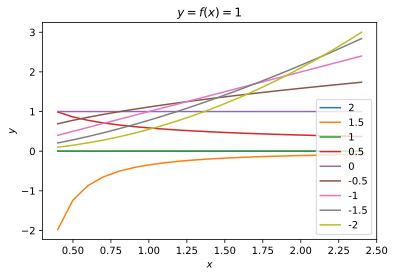

In [89]:
# 作图
for q in q_list:
    plt.plot(x_list[4:25], y_result[q][4:25], label=str(q))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.title(r'$y = f(x) = 1$')

In [90]:
# 三维示意图计算
x_list = np.arange(0, 3, 0.2)
y_list = [1 for i in range(len(x_list))]
q_list = np.arange(-2, 2.2, 0.2)
X, Q = np.meshgrid(x_list, q_list)
Y = np.empty([len(q_list), len(x_list)])
for q in range(len(q_list)):
    for x in range(len(x_list)):
        Y[q, x] = differintegral(x_list, y_list, q_list[q], 0, x)

Text(0.5,0,'$y$')

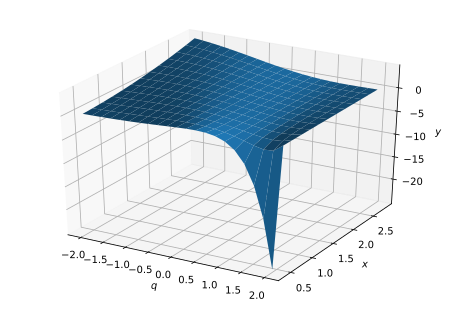

In [91]:
# 三维示意图作图
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Q[:, 2:], X[:, 2:], Y[:, 2:])
ax.set_xlabel(r'$q$')
ax.set_ylabel(r'$x$')
ax.set_zlabel(r'$y$')

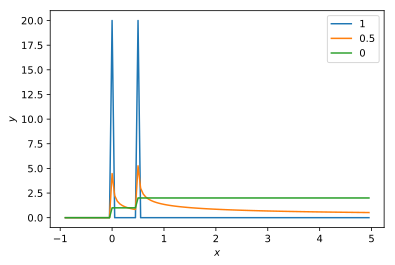

In [18]:
x_list = np.arange(-1, 5, 0.05)
y_list = np.heaviside(x_list, 1) + np.heaviside(x_list - 0.5, 1)
q_list = [1, 1/2, 0]
y_result = {}
for q in q_list:
    temp = np.empty(len(x_list))
    for i in range(len(x_list)):
        temp[i] = differintegral(x_list, y_list, q, 0, i)
    y_result[q] = temp

for q in q_list:
    plt.plot(x_list[2:], y_result[q][2:], label=str(q))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()

In [6]:
np.heaviside(0, 1)

1.0